# Insurance Claims- Fraud Detection

## Problem Statement:

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims.Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, a dataset which has the details of the insurance policy along with the customer details is provided. It also has the details of the accident on the basis of which the claims have been made. 

In this example, we have to work with some auto insurance data to demonstrate how a predictive model that predicts if an insurance claim is fraudulent or not can be created.

The dataset has obervations from 1993 to 2015, it has all the details of the customer who took insurance and made claims. we are also given Umbrela limit which means that customer has taken additional policy cover as well. there are some missing values in the data which needs treatment. data is mix of data typs.

it is classification problem, we have 1000 rows and 40 coluns along with target columns which is fraud happened or not

## Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

## Loading The Dataset

In [2]:
fr_df= pd.read_csv("Automobile_insurance_fraud.csv")
fr_df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
pd.set_option("display.max_columns", None)
fr_df.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0,0,02-01-2015,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,8973 Washington St,19,3,NO,0,2,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,MALE,PhD,prof-specialty,board-games,husband,0,-77000,13-01-2015,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,5846 Weaver Drive,0,3,?,0,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,MALE,Associate,tech-support,base-jumping,unmarried,0,0,27-02-2015,Multi-vehicle Collision,Front Collision,Total Loss,Police,VA,Columbus,3525 3rd Hwy,23,3,?,2,2,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,FEMALE,PhD,other-service,golf,own-child,0,0,30-01-2015,Single Vehicle Collision,Front Collision,Total Loss,Police,WV,Arlington,4872 Rock Ridge,21,1,NO,1,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,MALE,PhD,priv-house-serv,camping,wife,0,-39300,05-01-2015,Single Vehicle Collision,Rear Collision,Total Loss,Other,NC,Hillsdale,3066 Francis Ave,14,1,NO,2,1,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


In [4]:
fr_df.tail(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
990,286,43,663190,05-02-1994,IL,100/300,500,1564.43,3000000,477644,FEMALE,MD,prof-specialty,movies,unmarried,77500,-32800,31-01-2015,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,NY,Northbrook,4755 1st St,18,1,?,2,2,YES,34290,3810,3810,26670,Jeep,Grand Cherokee,2013,N,NaN
991,257,44,109392,12-07-2006,OH,100/300,1000,1280.88,0,433981,MALE,MD,other-service,basketball,other-relative,59400,-32200,06-02-2015,Single Vehicle Collision,Rear Collision,Total Loss,Other,WV,Riverwood,5312 Francis Ridge,21,1,NO,0,1,NO,46980,0,5220,41760,Accura,TL,2002,N,NaN
992,94,26,215278,24-10-2007,IN,100/300,500,722.66,0,433696,MALE,MD,exec-managerial,camping,husband,50300,0,23-01-2015,Multi-vehicle Collision,Front Collision,Major Damage,Fire,OH,Springfield,1705 Weaver St,6,3,YES,1,2,YES,36700,3670,7340,25690,Nissan,Pathfinder,2010,N,NaN
993,124,28,674570,08-12-2001,OH,250/500,1000,1235.14,0,443567,MALE,MD,exec-managerial,camping,husband,0,-32100,17-02-2015,Multi-vehicle Collision,Side Collision,Total Loss,Other,OH,Hillsdale,1643 Washington Hwy,20,3,?,0,1,?,60200,6020,6020,48160,Volkswagen,Passat,2012,N,NaN
994,141,30,681486,24-03-2007,IN,500/1000,1000,1347.04,0,430665,MALE,High School,sales,bungie-jumping,own-child,0,-82100,22-01-2015,Parked Car,?,Minor Damage,None,SC,Northbend,6516 Solo Drive,6,1,?,1,2,YES,6480,540,1080,4860,Honda,Civic,1996,N,NaN
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,FEMALE,Associate,sales,kayaking,husband,0,0,26-02-2015,Parked Car,?,Minor Damage,Police,WV,Columbus,1416 Cherokee Ridge,6,1,?,0,3,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [5]:
fr_df.shape

(1000, 40)

we have 1000 rows and 40 columns including target. let check the data type of the columns

In [6]:
fr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

we have float64(2), int64(17), object(21) columns. last column _c39 all are null values. lets check the missing value in others columns

In [7]:
fr_df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [8]:
# we are deleting it _c39 as it has only null values.
fr_df.drop("_c39",axis =1, inplace = True)

## Replace & fill Missing values

In [9]:
# There are ? values which we will convert to nan values
fr_df = fr_df.replace("?", np.nan) 

In [10]:
#Again checking nan values
fr_df.isna().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

<AxesSubplot:>

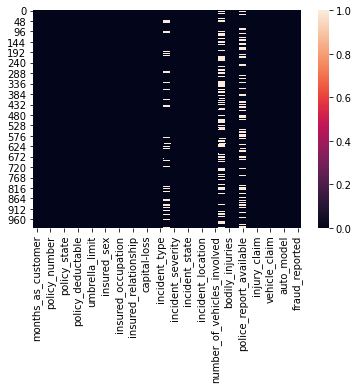

In [11]:
#To check missing values
sns.heatmap(fr_df.isnull())

There are null values in collision_type, property_damage and police_report_available columns. 

All these thre columns are object dtype.  So we will use most frequent /mode to replace nan values

In [12]:
from sklearn.impute import SimpleImputer

#For Object dtype columns
imp= SimpleImputer(strategy="most_frequent")
fr_df["collision_type"]= imp.fit_transform(fr_df["collision_type"].values.reshape(-1,1))
fr_df["property_damage"]= imp.fit_transform(fr_df["property_damage"].values.reshape(-1,1))
fr_df["police_report_available"]= imp.fit_transform(fr_df["police_report_available"].values.reshape(-1,1))

In [13]:
# checking the missing value, that how many colums have actully missing value
missing_val ={}
for i in fr_df.columns:
    if fr_df[i].isnull().sum() >0:
        missing_val[i] = fr_df[i].isnull().sum()
print(missing_val)

{}


now there is no null values in the dataset.

## Statistics Summary

In [14]:
# For all numerical variables
fr_df.describe() 

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


Key Observations:

1. The mean is much more than median(50th percentile) in all the columns.wherever Mean value is higher than the median value, that data is skewed data. Also they have huge variance in their data in some columns like total_claim_amount,property_claim,vehicle_claim.
2. Also there is a large difference between 75% and max value i some columns. They might have outliers in the columns.
3. policy_deductable money is 2000 max and minimum is 500 against the premium 2047 whcih is max.
4. umbrela limit is the policy which customer take over and above the insurance policy like while taking the term loan, diseases cover is also taken for some amount
5. capital gain is 100500 max and max loss which customer had to bear is 111100  which is very high !

In [15]:
num_col=fr_df.select_dtypes(exclude="object")
num_col

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004
1,228,42,342868,2000,1197.22,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007
3,256,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014
4,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1000,1310.80,0,431289,0,0,20,1,0,1,87200,17440,8720,61040,2006
996,285,41,186934,1000,1436.79,0,608177,70900,0,23,1,2,3,108480,18080,18080,72320,2015
997,130,34,918516,500,1383.49,3000000,442797,35100,0,4,3,2,3,67500,7500,7500,52500,1996
998,458,62,533940,2000,1356.92,5000000,441714,0,0,2,1,0,1,46980,5220,5220,36540,1998


In [16]:
categorical_col= fr_df.select_dtypes(include="object")
categorical_col

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,17-10-2014,OH,250/500,MALE,MD,craft-repair,sleeping,husband,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,YES,YES,Saab,92x,Y
1,27-06-2006,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,21-01-2015,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,NO,NO,Mercedes,E400,Y
2,06-09-2000,OH,100/300,FEMALE,PhD,sales,board-games,own-child,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,NO,NO,Dodge,RAM,N
3,25-05-1990,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,NO,NO,Chevrolet,Tahoe,Y
4,06-06-2014,IL,500/1000,MALE,Associate,sales,board-games,unmarried,17-02-2015,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,NO,NO,Accura,RSX,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,16-07-1991,OH,500/1000,FEMALE,Masters,craft-repair,paintball,unmarried,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,YES,NO,Honda,Accord,N
996,05-01-2014,IL,100/300,FEMALE,PhD,prof-specialty,sleeping,wife,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,YES,NO,Volkswagen,Passat,N
997,17-02-2003,OH,250/500,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,NO,YES,Suburu,Impreza,N
998,18-11-2011,IL,500/1000,MALE,Associate,handlers-cleaners,base-jumping,wife,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,NO,YES,Audi,A5,N


In [17]:
# For all categorical variables
categorical_col.describe()

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,951,3,3,2,7,14,20,6,60,4,3,4,5,7,7,1000,2,2,14,39,2
top,05-08-1992,OH,250/500,FEMALE,JD,machine-op-inspct,reading,own-child,02-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Springfield,2306 5th Lane,NO,NO,Saab,RAM,N
freq,3,352,351,537,161,93,64,183,28,419,470,354,292,262,157,1,698,686,80,43,753


Most of the customer insured are females. 

Most of the collisions are Multi-vehicle collision type.

Maximum incident was reported from New york

**Let's check the value counts for categorical columns**

In [18]:
fr_df['policy_state'].nunique()

3

In [19]:
fr_df['policy_bind_date'].nunique()

951

In [20]:
fr_df['incident_state'].nunique()

7

In [21]:
fr_df['incident_type'].unique()

array(['Single Vehicle Collision', 'Vehicle Theft',
       'Multi-vehicle Collision', 'Parked Car'], dtype=object)

In [22]:
fr_df['collision_type'].unique()

array(['Side Collision', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [23]:
fr_df['incident_severity'].unique()

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

In [24]:
fr_df['police_report_available'].unique()

array(['YES', 'NO'], dtype=object)

In [25]:
fr_df['auto_year'].unique()

array([2004, 2007, 2014, 2009, 2003, 2012, 2015, 1996, 2002, 2006, 2000,
       2010, 1999, 2011, 2005, 2008, 1995, 2001, 1998, 1997, 2013],
      dtype=int64)

In [26]:
for i in categorical_col:
    print(i)
    print(fr_df[i].value_counts())
    print('\n')

policy_bind_date
05-08-1992    3
01-01-2006    3
28-04-1992    3
09-07-2002    2
04-06-2000    2
             ..
14-07-2000    1
19-09-2012    1
11-09-2004    1
01-03-2012    1
06-09-1995    1
Name: policy_bind_date, Length: 951, dtype: int64


policy_state
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


policy_csl
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


insured_sex
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
h

## EDA

In [27]:
# fraud actvity wise claim amount
fr_df.groupby("fraud_reported")["policy_annual_premium","total_claim_amount","injury_claim","property_claim","vehicle_claim"].mean()

,policy_annual_premium,total_claim_amount,injury_claim,property_claim,vehicle_claim
fraud_reported,,,,,
N,1258.430000,50288.605578,7179.229748,7018.884462,36090.491368
Y,1250.236275,60302.105263,8208.340081,8560.121457,43533.643725


Y denotes to fraud activity and and it is seen that amount is higher incase any one doing fraud, it is higher in all category

In [28]:
fr_df.groupby(["incident_state"])["policy_annual_premium","total_claim_amount","injury_claim","property_claim","vehicle_claim"].mean().sort_values

<bound method DataFrame.sort_values of                 policy_annual_premium  total_claim_amount  injury_claim  \
incident_state                                                            
NC                        1238.647636        49283.909091   6535.000000   
NY                        1254.098397        56388.435115   7965.687023   
OH                        1210.506957        49770.434783   7321.304348   
PA                        1237.763333        49571.666667   6872.666667   
SC                        1240.556089        54589.314516   7709.153226   
VA                        1293.561545        49997.909091   7306.818182   
WV                        1274.916544        50217.281106   7084.654378   

                property_claim  vehicle_claim  
incident_state                                 
NC                 6808.818182   35940.090909  
NY                 7847.519084   40575.229008  
OH                 6533.913043   35915.217391  
PA                 7595.666667   35103.333333

top 3 states where maximum fraud amount claimed are NY,SC,WV and these are the states where maximum incident happened

## Univariate analysis

#### Analysing the target column

N    753
Y    247
Name: fraud_reported, dtype: int64


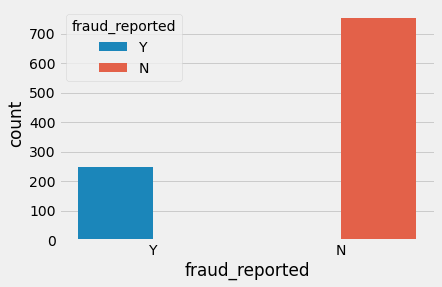

In [29]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(6,4))
ax = sns.countplot(x='fraud_reported', data=fr_df, hue='fraud_reported')
print(fr_df['fraud_reported'].value_counts())

In [30]:
# Checking percentage of fraud reported for both the categories.
100*fr_df['fraud_reported'].value_counts()/len(fr_df['fraud_reported'])

N    75.3
Y    24.7
Name: fraud_reported, dtype: float64

Here we can see that out of 1000 case reported, only 247 reports are fraud which is around 24.7% and 753 are not fraud which is 75.3% of total.

Data is highly imbalanced. ratio= 75:25 So the data is imbalanced. So we will apply SMOTE analysis before ML of final model.

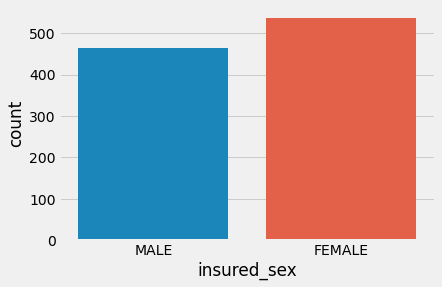

In [31]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(6,4))
ax = sns.countplot(x='insured_sex', data=fr_df)

more females are insured than males

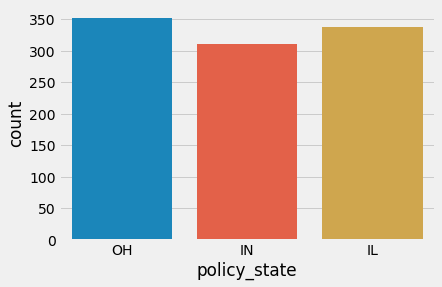

In [32]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(6,4))
ax = sns.countplot(x='policy_state', data=fr_df)

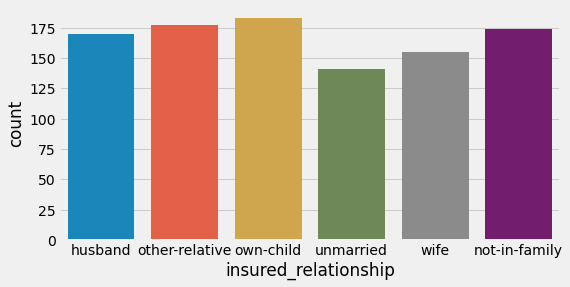

In [33]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(8,4))
ax = sns.countplot(x='insured_relationship', data=fr_df)

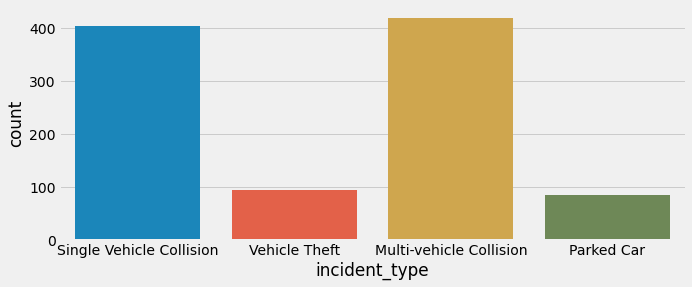

In [34]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,4))
ax = sns.countplot(x='incident_type', data=fr_df)

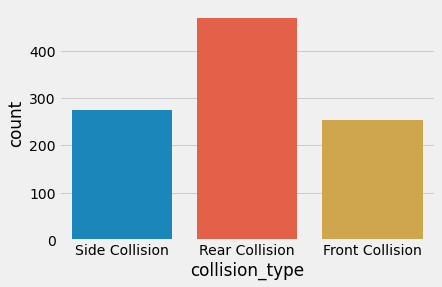

In [35]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(6,4))
ax = sns.countplot(x='collision_type', data=fr_df)

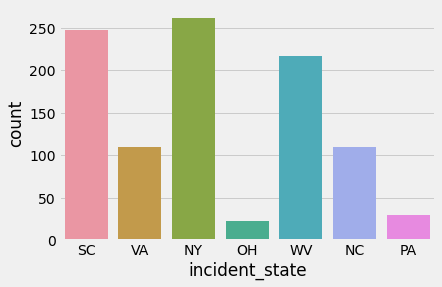

In [36]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(6,4))
ax = sns.countplot(x='incident_state', data=fr_df)

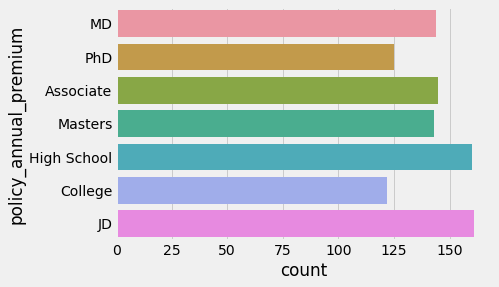

In [37]:
fig = plt.figure(figsize=(6,4))
ax = sns.countplot(y = 'insured_education_level', data=fr_df) 
ax.set_ylabel('policy_annual_premium')
plt.show()

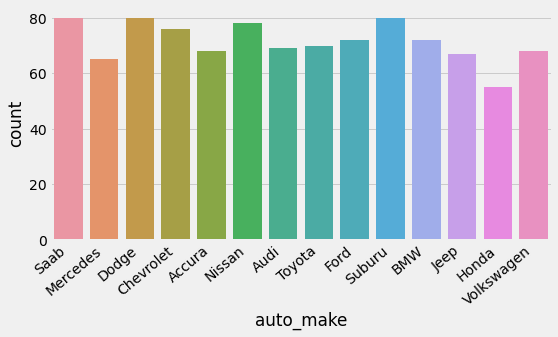

In [38]:
fig = plt.figure(figsize=(8,4))
ax = sns.countplot(x='auto_make', data=fr_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

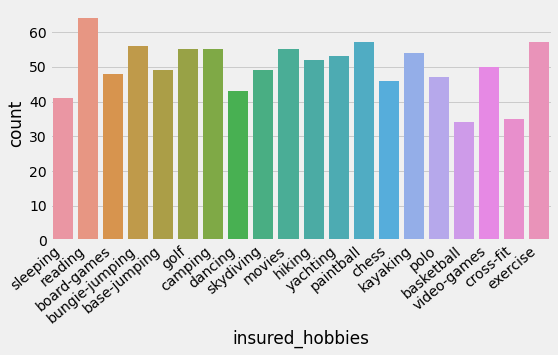

In [39]:
fig = plt.figure(figsize=(8,4))
ax = sns.countplot(x='insured_hobbies', data=fr_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

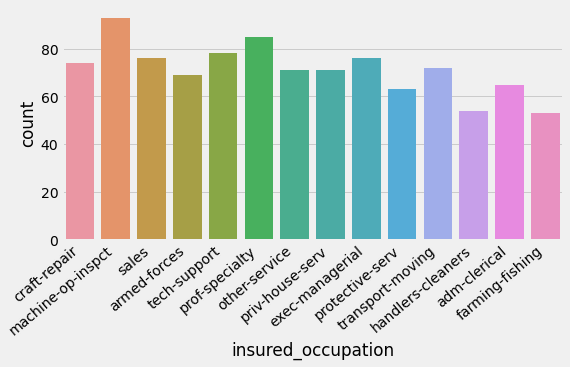

In [40]:
fig = plt.figure(figsize=(8,4))
ax = sns.countplot(x='insured_occupation', data=fr_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

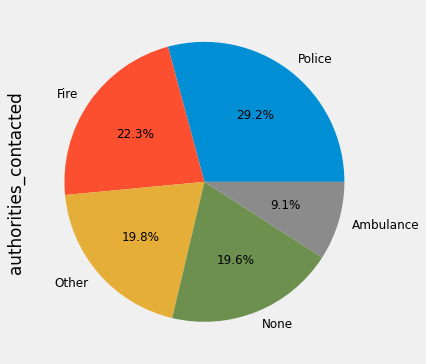

In [41]:
fig = plt.figure(figsize=(10,6))
ax = (fr_df['authorities_contacted'].value_counts()*100.0 /len(fr_df))\
.plot.pie(autopct='%.1f%%', labels = ['Police', 'Fire', 'Other', 'None', 'Ambulance'],
         fontsize=12) 

**age vs target column**

Text(0, 0.5, 'Fraud Reported')

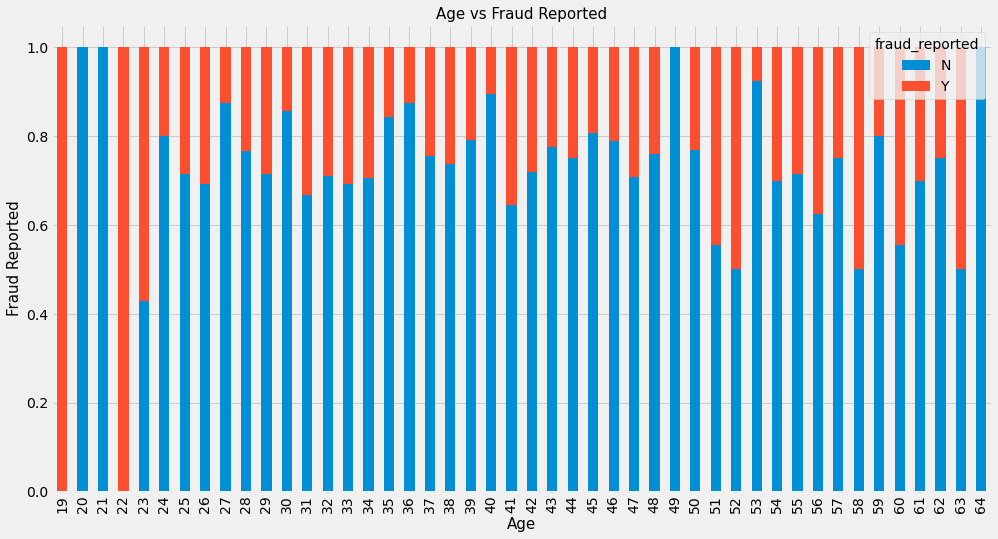

In [42]:
plt.rcParams['figure.figsize'] = [15, 8]
table=pd.crosstab(fr_df['age'],fr_df['fraud_reported'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)
plt.title('Age vs Fraud Reported',fontsize=15)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Fraud Reported',fontsize=15)

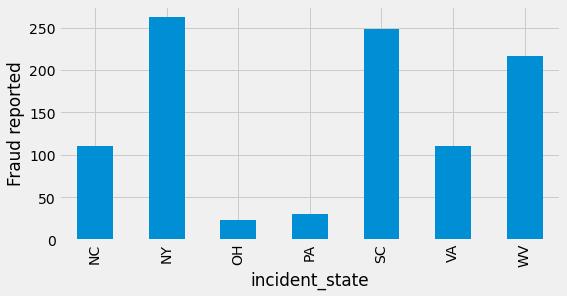

NY    262
SC    248
WV    217
NC    110
VA    110
PA     30
OH     23
Name: incident_state, dtype: int64


In [43]:
# Comparing fraud_reported with incident_state
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(8,4))
ax = fr_df.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()
print(fr_df['incident_state'].value_counts())

Here we can conclude that most of the fraud cases were reported in Newyork and least in OH.

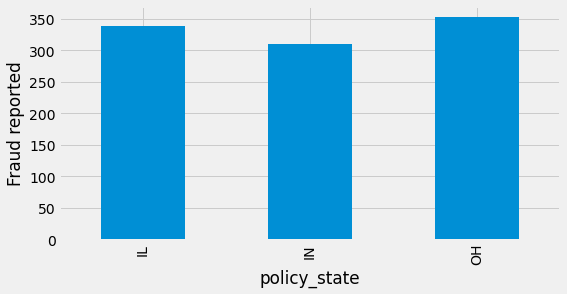

In [44]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(8,4))
ax = fr_df.groupby('policy_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

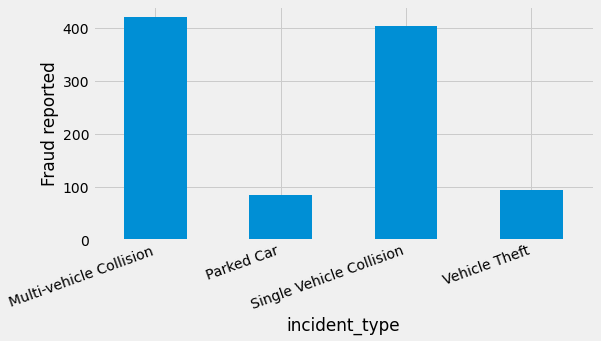

In [45]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(8,4))
ax = fr_df.groupby('incident_type').fraud_reported.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.set_ylabel('Fraud reported')
plt.show()

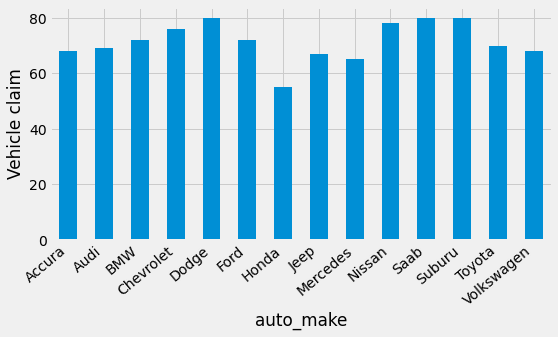

In [46]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(8,4))
ax= fr_df.groupby('auto_make').vehicle_claim.count().plot.bar(ylim=0)
ax.set_ylabel('Vehicle claim')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

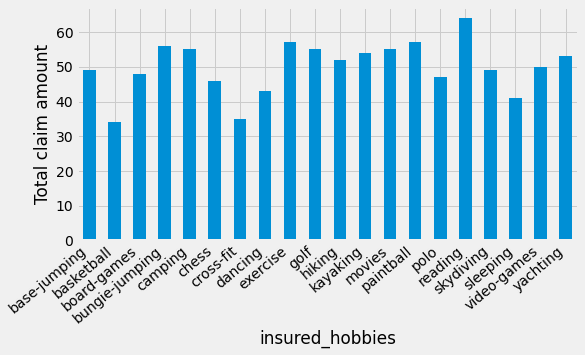

In [47]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(8,4))
ax= fr_df.groupby('insured_hobbies').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Total claim amount')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

**for numerical columns**

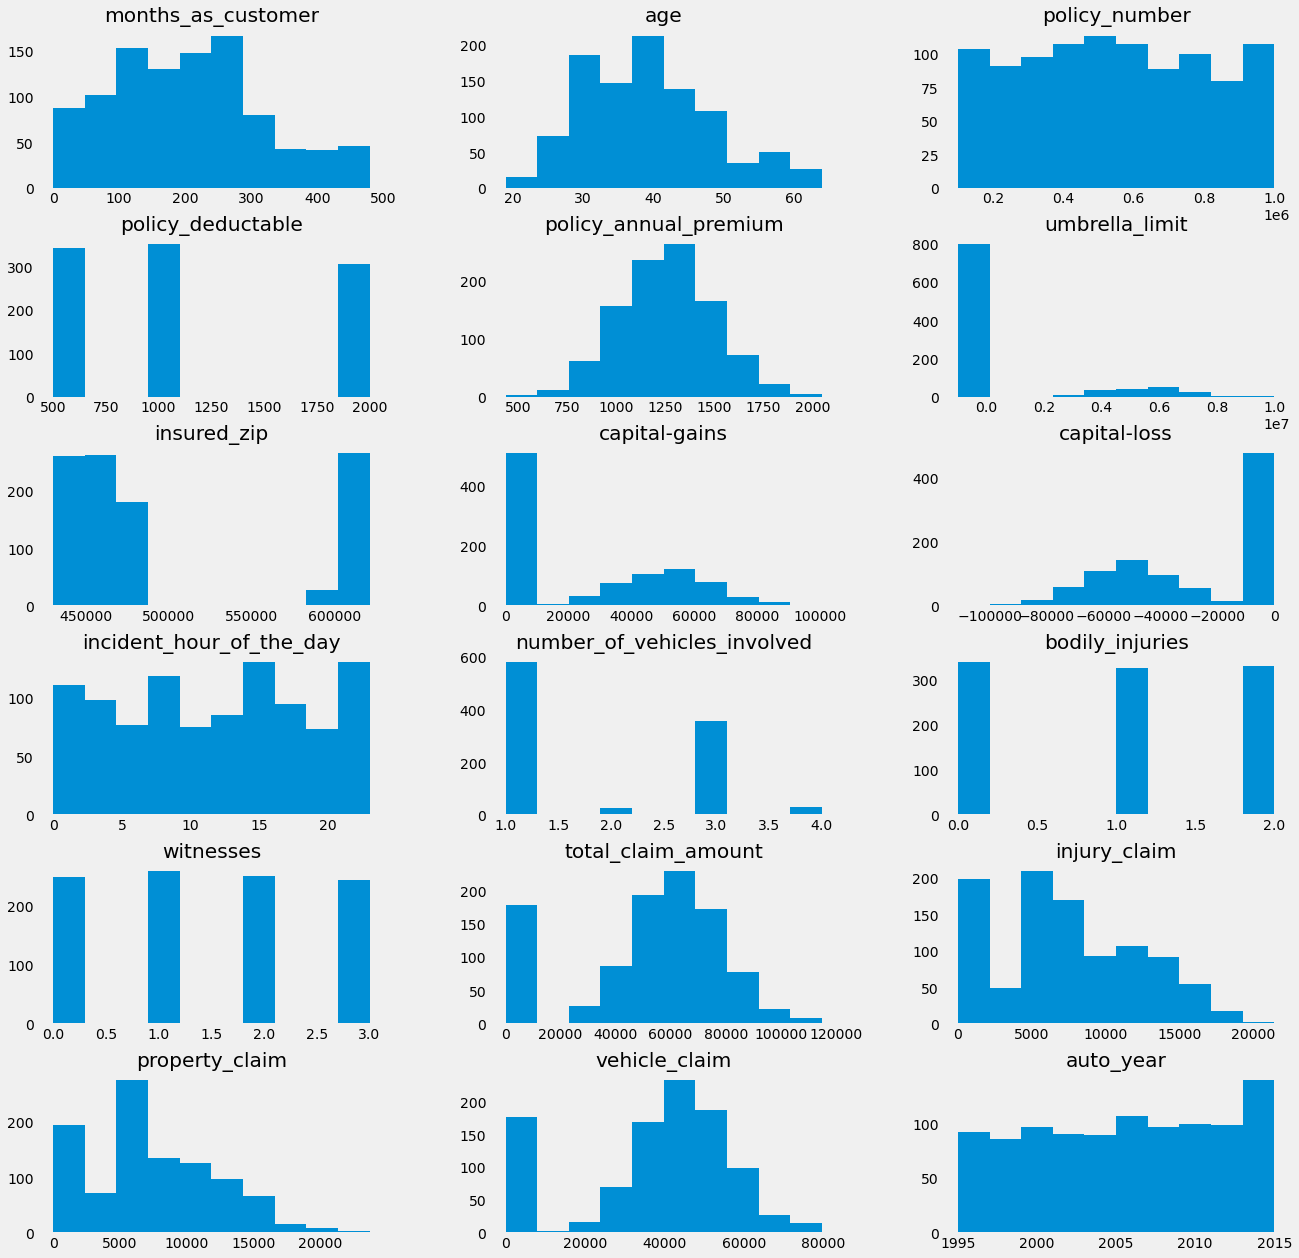

In [48]:
num_col.hist(figsize = (20,35), layout = (10,3), grid = False);

couple of columns are nominal and their data types already int and we cannot perform any statistical method, like correct outlier or skewnes etc

capital_win is right skewed and loss is left skewed

annual claim is close to normal distribution

## Label encoding

In [49]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
fr_df['fraud_reported']=le.fit_transform(fr_df['fraud_reported'])

In [50]:
#for target col, Y=1, 0=N
# sex, M=1,F=0

## Correlation map

In [51]:
# checking relation of numeric col wit target col

In [52]:
fr_df.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292,0.020544
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354,0.012143
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183,-0.029443
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893,0.058622
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736,0.019368
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398,-0.019173
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615,-0.014863
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368,0.004316


<AxesSubplot:>

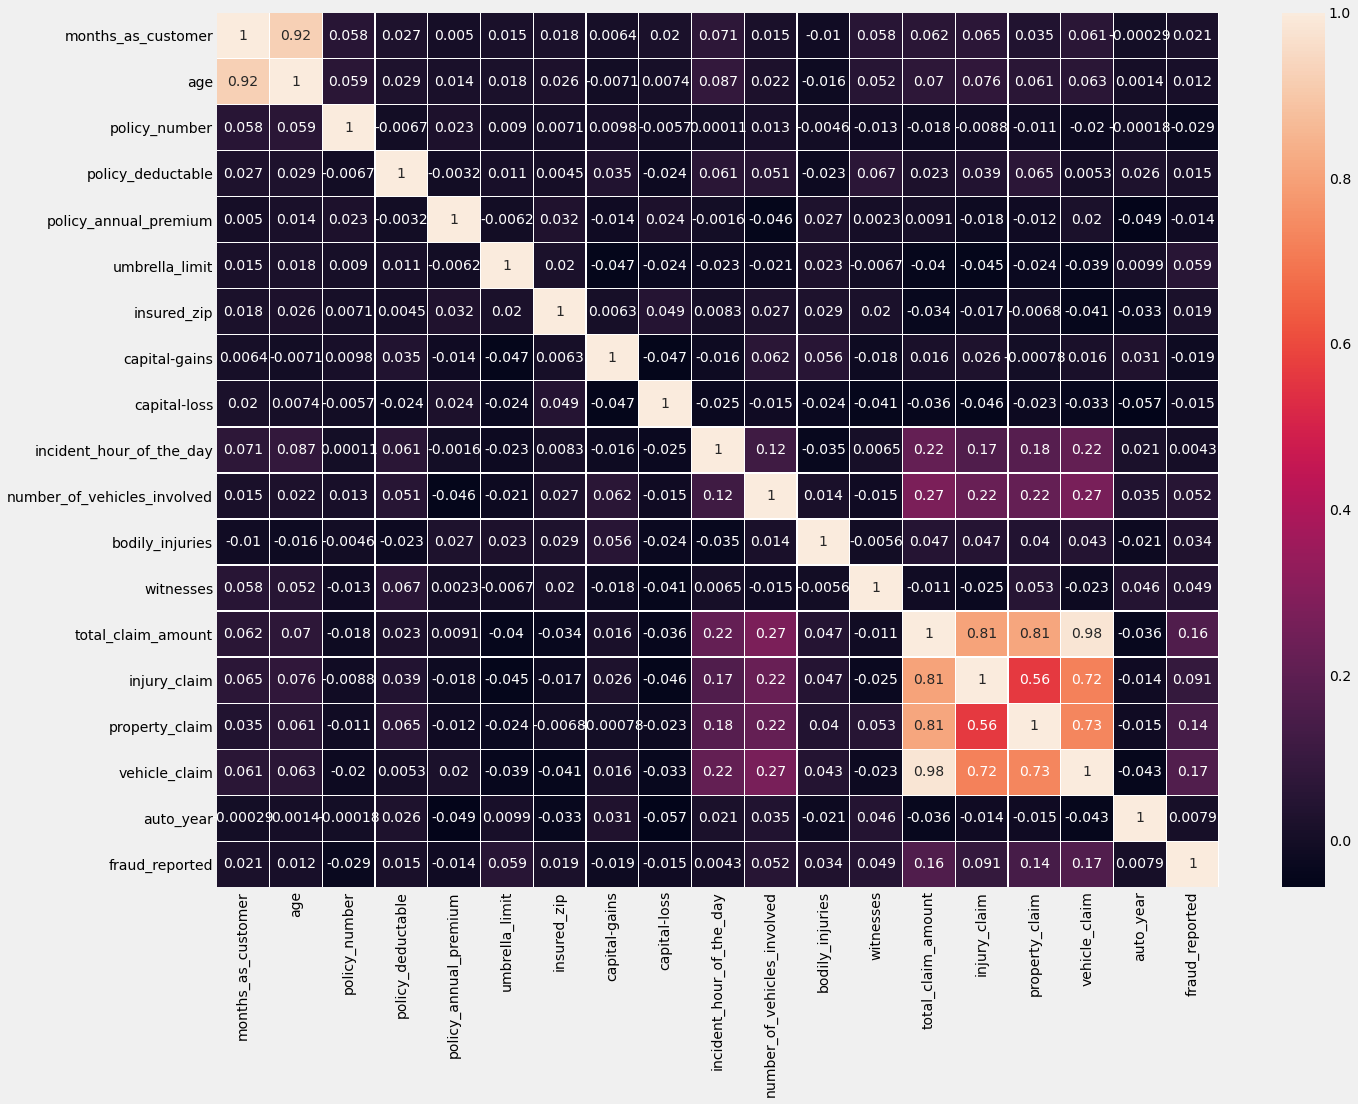

In [53]:
plt.figure(figsize =(20,15))
sns.heatmap(fr_df.corr(),annot=True,linecolor='white',linewidths=.25)

Since there is multicollinearity between total_claim amount, injury_claim,property_claim, and vehicle_claim. Also 
total_claim amount = injury_claim+property_claim+vehicle_claim. So we will drop the columns injury_claim,property_claim, and vehicle_claim.

In [54]:
fr_df.drop(columns=['injury_claim','property_claim','vehicle_claim'],axis=1,inplace=True)
fr_df.head(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,Saab,92x,2004,1
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,5070,Mercedes,E400,2007,1
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,Dodge,RAM,2007,0
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,63400,Chevrolet,Tahoe,2014,1
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,Accura,RSX,2009,0


In [55]:
# dropping unimportant columns

fr_df = fr_df.drop(columns = ['policy_number','insured_zip','policy_bind_date', 'incident_date', 'incident_location',
                        'auto_year'])

fr_df.head(2)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_model,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,Saab,92x,1
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,8,1,NO,0,0,NO,5070,Mercedes,E400,1


In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
fr_df["policy_state"] = le.fit_transform(fr_df["policy_state"])
fr_df["policy_csl"] = le.fit_transform(fr_df["policy_csl"])
fr_df["insured_sex"] = le.fit_transform(fr_df["insured_sex"])
fr_df["insured_education_level"] = le.fit_transform(fr_df["insured_education_level"])
fr_df["insured_occupation"] = le.fit_transform(fr_df["insured_occupation"])
fr_df["insured_hobbies"] = le.fit_transform(fr_df["insured_hobbies"])
fr_df["insured_relationship"] = le.fit_transform(fr_df["insured_relationship"])
fr_df["incident_type"] = le.fit_transform(fr_df["incident_type"])
fr_df["collision_type"] = le.fit_transform(fr_df["collision_type"])
fr_df["incident_severity"] = le.fit_transform(fr_df["incident_severity"])
fr_df["authorities_contacted"] = le.fit_transform(fr_df["authorities_contacted"])
fr_df["incident_state"] = le.fit_transform(fr_df["incident_state"])
fr_df["incident_city"] = le.fit_transform(fr_df["incident_city"])
fr_df["property_damage"] = le.fit_transform(fr_df["property_damage"])
fr_df["police_report_available"] = le.fit_transform(fr_df["police_report_available"])
fr_df["auto_make"] = le.fit_transform(fr_df["auto_make"])
fr_df["auto_model"] = le.fit_transform(fr_df["auto_model"])

In [57]:
fr_df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_model,fraud_reported
0,328,48,2,1,1000,1406.91,0,1,4,2,17,0,53300,0,2,2,0,4,4,1,5,1,1,1,2,1,71610,10,1,1
1,228,42,1,1,2000,1197.22,5000000,1,4,6,15,2,0,0,3,1,1,4,5,5,8,1,0,0,0,0,5070,8,12,1
2,134,29,2,0,2000,1413.14,5000000,0,6,11,2,3,35100,0,0,1,1,4,1,1,7,3,0,2,3,0,34650,4,30,0
3,256,41,0,1,2000,1415.74,6000000,0,6,1,2,4,48900,-62400,2,0,0,4,2,0,5,1,0,1,2,0,63400,3,34,1
4,228,44,0,2,1000,1583.91,6000000,1,0,11,2,4,66000,-46000,3,1,1,2,1,0,20,1,0,0,1,0,6500,0,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,1310.80,0,0,5,2,13,4,0,0,2,0,1,1,0,4,20,1,1,0,1,0,87200,6,6,0
996,285,41,0,0,1000,1436.79,0,0,6,9,17,5,70900,0,2,1,0,1,4,3,23,1,1,2,3,0,108480,13,28,0
997,130,34,2,1,500,1383.49,3000000,0,5,1,3,2,35100,0,0,2,1,4,0,0,4,3,0,2,3,1,67500,11,19,0
998,458,62,0,2,2000,1356.92,5000000,1,0,5,0,5,0,0,2,1,0,3,1,0,2,1,0,0,1,1,46980,1,5,0


## Checking Multi-colinearity

In [58]:
#Seperating the features and target variable

x=fr_df.drop('fraud_reported', axis=1)
y=fr_df["fraud_reported"]

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,22.823329,months_as_customer
1,94.925812,age
2,2.516026,policy_state
3,2.438951,policy_csl
4,4.487396,policy_deductable
5,24.275667,policy_annual_premium
6,1.264419,umbrella_limit
7,1.901756,insured_sex
8,3.401421,insured_education_level
9,3.732218,insured_occupation


the vif value is very high for age column. So droping the age column

In [60]:
fr_df.drop('age',axis=1,inplace=True)

In [61]:
x=fr_df.drop('fraud_reported', axis=1)
y=fr_df["fraud_reported"]

In [62]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,4.234336,months_as_customer
1,2.511138,policy_state
2,2.428525,policy_csl
3,4.452421,policy_deductable
4,22.296883,policy_annual_premium
5,1.263257,umbrella_limit
6,1.896068,insured_sex
7,3.385625,insured_education_level
8,3.694567,insured_occupation
9,4.005605,insured_hobbies


## Checking the outliers

months_as_customer                 AxesSubplot(0.08,0.740345;0.124286x0.139655)
policy_state                   AxesSubplot(0.229143,0.740345;0.124286x0.139655)
policy_csl                     AxesSubplot(0.378286,0.740345;0.124286x0.139655)
policy_deductable              AxesSubplot(0.527429,0.740345;0.124286x0.139655)
policy_annual_premium          AxesSubplot(0.676571,0.740345;0.124286x0.139655)
umbrella_limit                 AxesSubplot(0.825714,0.740345;0.124286x0.139655)
insured_sex                        AxesSubplot(0.08,0.572759;0.124286x0.139655)
insured_education_level        AxesSubplot(0.229143,0.572759;0.124286x0.139655)
insured_occupation             AxesSubplot(0.378286,0.572759;0.124286x0.139655)
insured_hobbies                AxesSubplot(0.527429,0.572759;0.124286x0.139655)
insured_relationship           AxesSubplot(0.676571,0.572759;0.124286x0.139655)
capital-gains                  AxesSubplot(0.825714,0.572759;0.124286x0.139655)
capital-loss                       AxesS

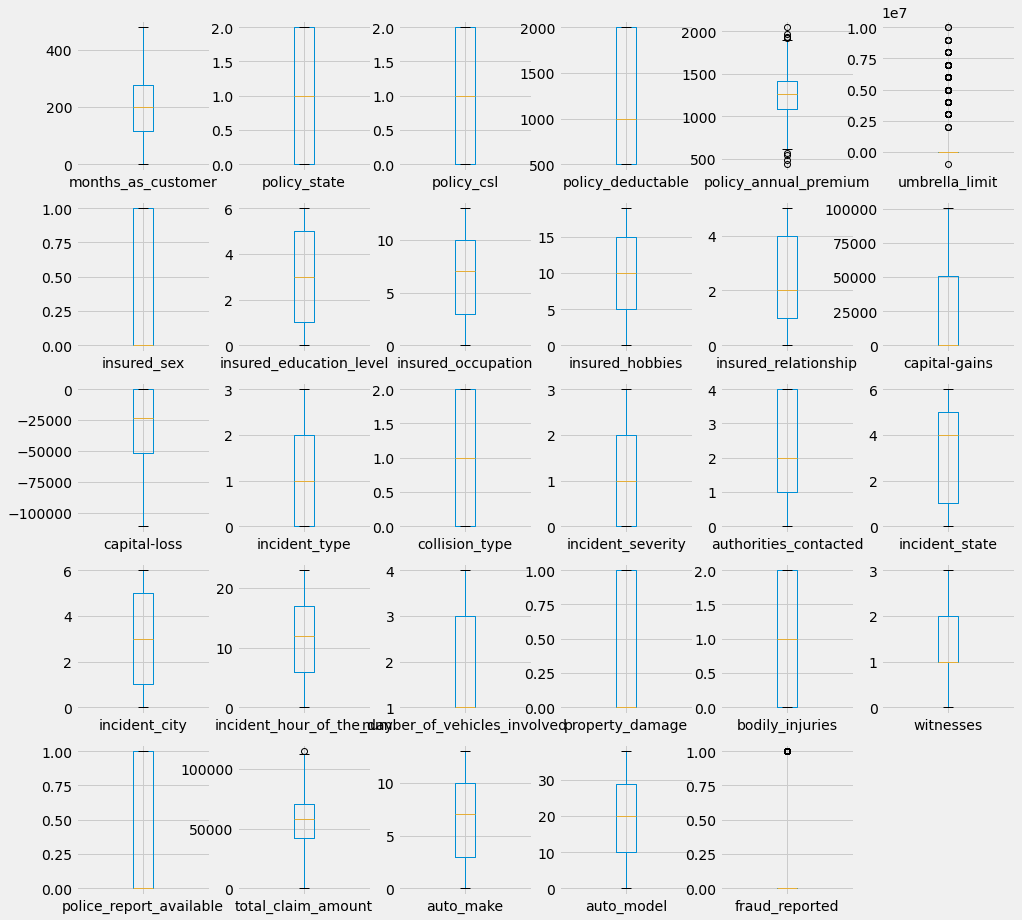

In [63]:
fr_df.plot(kind='box',subplots=True,layout=(5,6),figsize=(15,15))

In [64]:
#checking kurtosis values
kurt_data=fr_df.agg('kurtosis').transpose().sort_values(ascending=False)
kurt_data

umbrella_limit                 1.792077
policy_annual_premium          0.073889
total_claim_amount            -0.454081
months_as_customer            -0.485428
fraud_reported                -0.620500
incident_severity             -0.883516
collision_type                -1.110727
insured_hobbies               -1.159559
insured_education_level       -1.165531
auto_model                    -1.189997
incident_hour_of_the_day      -1.192940
insured_relationship          -1.203527
insured_occupation            -1.204499
auto_make                     -1.251407
property_damage               -1.256356
capital-gains                 -1.276704
incident_city                 -1.287896
capital-loss                  -1.313875
witnesses                     -1.343629
police_report_available       -1.358349
policy_deductable             -1.376943
policy_csl                    -1.449598
incident_state                -1.493467
number_of_vehicles_involved   -1.500467
bodily_injuries               -1.513178


the kurtosis values are very less in also the columns. Also from the box plot we can see there are no outliers in any of the columns other than in umbrella limit.

we have seen a few columns values near to upper and lower whiskers and considering those are ok for the data point.
So we don't need to remove outliers.

In [65]:
def outlier_treatment(x,variable):
    Q1 = x[variable].quantile(.2)
    Q3 = x[variable].quantile(.8)
    
    IQR = Q3-Q1
    lower_bound = Q1-(1.5*IQR)
    upper_bound = Q3+(1.5*IQR)
    x[variable] = np.where(x[variable]> upper_bound,upper_bound , np.where(x[variable] < lower_bound,lower_bound, x[variable]))

In [66]:
outlier_treatment(fr_df,"policy_annual_premium")

In [67]:
outlier_treatment(fr_df,"umbrella_limit")

## To check for Skewness

In [68]:
fr_df.skew()

months_as_customer             0.362177
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.005826
umbrella_limit                 1.568081
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.863806
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.802728


There is not much skewness in the data. So i am not removing the skewness

## Applying SMOTE to correct imbalance in target

In [69]:
x1=fr_df.drop('fraud_reported', axis=1)
y1=fr_df["fraud_reported"]
x1

,months_as_customer,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_model
0,328,2,1,1000,1406.91,0.0,1,4,2,17,0,53300,0,2,2,0,4,4,1,5,1,1,1,2,1,71610,10,1
1,228,1,1,2000,1197.22,5000000.0,1,4,6,15,2,0,0,3,1,1,4,5,5,8,1,0,0,0,0,5070,8,12
2,134,2,0,2000,1413.14,5000000.0,0,6,11,2,3,35100,0,0,1,1,4,1,1,7,3,0,2,3,0,34650,4,30
3,256,0,1,2000,1415.74,5000000.0,0,6,1,2,4,48900,-62400,2,0,0,4,2,0,5,1,0,1,2,0,63400,3,34
4,228,0,2,1000,1583.91,5000000.0,1,0,11,2,4,66000,-46000,3,1,1,2,1,0,20,1,0,0,1,0,6500,0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,2,2,1000,1310.80,0.0,0,5,2,13,4,0,0,2,0,1,1,0,4,20,1,1,0,1,0,87200,6,6
996,285,0,0,1000,1436.79,0.0,0,6,9,17,5,70900,0,2,1,0,1,4,3,23,1,1,2,3,0,108480,13,28
997,130,2,1,500,1383.49,3000000.0,0,5,1,3,2,35100,0,0,2,1,4,0,0,4,3,0,2,3,1,67500,11,19
998,458,0,2,2000,1356.92,5000000.0,1,0,5,0,5,0,0,2,1,0,3,1,0,2,1,0,0,1,1,46980,1,5


In [70]:
y1

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int32

In [71]:
#Balancing data by applying SMOTE.
from imblearn.over_sampling import SMOTE
smt=SMOTE()
sm_x,sm_y=smt.fit_resample(x1,y1)
print(sm_x.shape)
print(sm_y.shape)

(1506, 28)
(1506,)


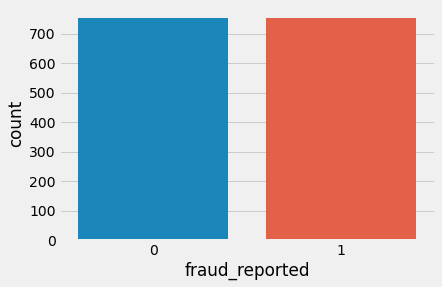

0    753
1    753
Name: fraud_reported, dtype: int64


In [72]:
plt.figure(figsize=(6,4))
sns.countplot(sm_y)
plt.show()
print(sm_y.value_counts())

In [73]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
sm_x=scale.fit_transform(sm_x)
sm_x

array([[ 1.12189906,  1.3364793 ,  0.21880997, ...,  0.66857948,
         0.95604019, -1.73646933],
       [ 0.20417776,  0.07457471,  0.21880997, ..., -2.09254164,
         0.43238261, -0.67348984],
       [-0.65848027,  1.3364793 , -1.07345598, ..., -0.86510006,
        -0.61493256,  1.06593114],
       ...,
       [ 0.20417776, -1.18732989, -1.07345598, ...,  0.16739492,
        -0.61493256,  0.09958615],
       [-0.57588535, -1.18732989, -1.07345598, ..., -2.09474091,
        -1.13859015,  0.09958615],
       [ 1.89278496,  0.07457471, -1.07345598, ...,  0.04174607,
         0.43238261,  0.38948965]])

In [74]:
sm_y

0       1
1       1
2       0
3       1
4       0
       ..
1501    1
1502    1
1503    1
1504    1
1505    1
Name: fraud_reported, Length: 1506, dtype: int32

## Creating Model

In [75]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Finding Best Random State

In [76]:
maxAcc = 0
maxRS = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(sm_x,sm_y,random_state=i,test_size=0.30)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf= LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('Best score is',maxAcc,'on Random State',maxRS)

Best score is 0.8473451327433629 on Random State 77


In [77]:
x_train,x_test,y_train,y_test=train_test_split(sm_x,sm_y,test_size=.30,random_state=maxRS)

In [78]:
# Checking train and test data size
print(x_train.shape,'\t',x_test.shape)

(1054, 28) 	 (452, 28)


In [79]:
print(y_train.shape,'\t',y_test.shape)

(1054,) 	 (452,)


## Checking with different algorithms

In [80]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')


model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Train score",m.score(x_train,y_train))
    print('Accuracy score of',m, 'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Train score 0.8026565464895635
Accuracy score of LogisticRegression() is:
0.8473451327433629
[[202  37]
 [ 32 181]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       239
           1       0.83      0.85      0.84       213

    accuracy                           0.85       452
   macro avg       0.85      0.85      0.85       452
weighted avg       0.85      0.85      0.85       452



Train score 0.793168880455408
Accuracy score of GaussianNB() is:
0.8008849557522124
[[193  46]
 [ 44 169]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       239
           1       0.79      0.79      0.79       213

    accuracy                           0.80       452
   macro avg       0.80      0.80      0.80       452
weighted avg       0.80      0.80      0.80       452



Train score 0.9449715370018975
Accuracy score of SVC() is:
0.8539823008849557
[[208  31]
 [ 35 178]]
              prec

 We are getting highest accuracy with GaussianNB and less variance in train and test score.

## Using Ensemble Technique to boostup score

In [81]:
# Checking accuracy for Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100,random_state=160,criterion='gini')
rfc.fit(x_train,y_train)

# Prediction
predrfc = rfc.predict(x_test)
print("Train score",rfc.score(x_train,y_train))
print(accuracy_score(y_test, predrfc))
print(confusion_matrix(y_test, predrfc))
print(classification_report(y_test,predrfc))

Train score 1.0
0.8805309734513275
[[210  29]
 [ 25 188]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       239
           1       0.87      0.88      0.87       213

    accuracy                           0.88       452
   macro avg       0.88      0.88      0.88       452
weighted avg       0.88      0.88      0.88       452



In [82]:
# Checking accuracy for Gradient Boosting Classifier
GBc = GradientBoostingClassifier()
GBc.fit(x_train,y_train)

# Prediction
predGBc = GBc.predict(x_test)
print("Train score",GBc.score(x_train,y_train))
print(accuracy_score(y_test, predGBc))
print(confusion_matrix(y_test, predGBc))
print(classification_report(y_test,predGBc))

Train score 0.9573055028462998
0.8915929203539823
[[210  29]
 [ 20 193]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       239
           1       0.87      0.91      0.89       213

    accuracy                           0.89       452
   macro avg       0.89      0.89      0.89       452
weighted avg       0.89      0.89      0.89       452



In [83]:
# Checking accuracy for AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
adc=AdaBoostClassifier(n_estimators=100,random_state=160,base_estimator=SVC(),algorithm='SAMME',learning_rate=0.01)
adc.fit(x_train,y_train)
adc_pred=adc.predict(x_test)
print("Train score",adc.score(x_train,y_train))
print(accuracy_score(y_test,adc_pred))
print(confusion_matrix(y_test,adc_pred))
print(classification_report(y_test,adc_pred))

Train score 0.5123339658444023
0.47123893805309736
[[  0 239]
 [  0 213]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       239
           1       0.47      1.00      0.64       213

    accuracy                           0.47       452
   macro avg       0.24      0.50      0.32       452
weighted avg       0.22      0.47      0.30       452



I am getting best accuracy on RandomForestClassifier().So checking the Cv Score for rfc model and hypertuning it to get the best parameters.

## Hyperparameter tuning

In [84]:
from sklearn.model_selection import RandomizedSearchCV,cross_val_score

# we are checking best parameter which suited most for the model

para = {"n_estimators":[100,200,300,400],
        "learning_rate":[0.1,0.3,0.5],
        "max_depth" :[3,5,7,9,10]}

grid = RandomizedSearchCV(GBc, para, scoring= "accuracy",cv = 5, n_iter=50,n_jobs=-1,verbose=2)

grid.fit(x_train,y_train)
print("Train score",grid.score(x_train,y_train))
print("score",grid.best_score_)
print("best parameter",grid.best_params_)
print("best estimator",grid.best_estimator_)
grid_pred=grid.best_estimator_.predict(x_test) # predicting with best parameters

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Train score 1.0
score 0.887099977431731
best parameter {'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.3}
best estimator GradientBoostingClassifier(learning_rate=0.3, max_depth=7)


## Cross Validation

In [85]:
best_parameter_GB = GradientBoostingClassifier(learning_rate=0.3, max_depth=7, n_estimators=100)

for i in range(2,7):
    cv = cross_val_score(GBc,sm_x,sm_y,cv=i)
    print(f'at CV {i} The mean is  {cv.mean()} and the SD is {cv.std()}') 

at CV 2 The mean is  0.8220451527224435 and the SD is 0.0743691899070385
at CV 3 The mean is  0.8173970783532537 and the SD is 0.11722373674911084
at CV 4 The mean is  0.838732434110277 and the SD is 0.09388896408550082
at CV 5 The mean is  0.8506919539724098 and the SD is 0.08390277572542774
at CV 6 The mean is  0.8585657370517928 and the SD is 0.08898981103440808


selecting cv score=6

In [85]:
# Cross validate of GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
score=cross_val_score(GBc,sm_x,sm_y,cv=6,scoring='accuracy',verbose=1,n_jobs=-1)
print('Score:', score)
print('Mean Score:', score.mean())
print('Standard Deviation:', score.std())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:    2.0s remaining:    4.1s


Score: [0.75298805 0.77290837 0.90438247 0.88446215 0.94023904 0.90039841]
Mean Score: 0.8592297476759628
Standard Deviation: 0.07032245574966124


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    2.3s finished


In [87]:
fraud_reported =GradientBoostingClassifier(learning_rate=0.3, max_depth=7, n_estimators=100)
fraud_reported.fit(x_train, y_train)
pred = fraud_reported.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

89.15929203539822


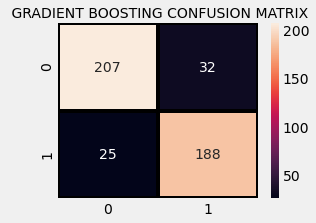

In [88]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, grid_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" GRADIENT BOOSTING CONFUSION MATRIX",fontsize=14)
plt.show()

## AUC ROC Curve

In [89]:
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

In [90]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.3, 0.5],
                                        'max_depth': [3, 5, 7, 9, 10],
                                        'n_estimators': [100, 200, 300, 400]},
                   scoring='accuracy', verbose=2)

In [91]:
y_pred_prob=grid.predict_proba(x_test)[:,1]
y_pred_prob

array([9.99935095e-01, 8.34872889e-05, 9.87334532e-01, 1.34250067e-03,
       1.78743478e-01, 9.09380445e-01, 9.88201373e-01, 1.75255014e-01,
       3.20194632e-05, 9.98414298e-01, 9.96383761e-01, 2.60034224e-03,
       3.19463591e-01, 7.78768068e-01, 9.99805259e-01, 3.72805865e-04,
       9.99955763e-01, 7.66581541e-04, 9.99406204e-01, 1.62123045e-03,
       9.23039219e-05, 1.68238363e-04, 9.99632513e-01, 9.98669375e-01,
       6.10177820e-04, 9.99548389e-01, 9.99875704e-01, 1.65722246e-04,
       9.99538946e-01, 9.98756977e-01, 2.27545408e-01, 9.99973813e-01,
       9.98172358e-01, 9.99979987e-01, 3.45332707e-01, 9.99875090e-01,
       3.97986139e-05, 9.74766218e-01, 9.99300544e-01, 9.99260484e-01,
       4.98618319e-03, 6.97222968e-02, 9.90321214e-01, 9.99822695e-01,
       1.36615286e-02, 9.99914244e-01, 9.98878287e-01, 3.54463392e-04,
       1.56479495e-05, 9.99709093e-01, 1.08268651e-03, 9.99916008e-01,
       4.27505084e-04, 1.67134414e-02, 1.88122704e-06, 9.81440331e-01,
      

In [92]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [93]:
fpr,tpr,thresholds

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.0041841 , 0.0041841 , 0.0083682 , 0.0083682 , 0.0125523 ,
        0.0125523 , 0.0167364 , 0.0167364 , 0.0209205 , 0.0209205 ,
        0.0292887 , 0.0292887 , 0.0334728 , 0.0334728 , 0.041841  ,
        0.041841  , 0.0460251 , 0.0460251 , 0.05020921, 0.05020921,
        0.05857741, 0.05857741, 0.06276151, 0.06276151, 0.06694561,
        0.06694561, 0.07112971, 0.07112971, 0.07531381, 0.07531381,
        0.07949791, 0.07949791, 0.08786611, 0.08786611, 0.09623431,
        0.09623431, 0.10041841, 0.10041841, 0.10878661, 0.10878661,
        0.11715481, 0.11715481, 0.12970711, 0.12970711, 0.13389121,
        0.13389121, 0.14225941, 0.14225941, 0.16317992, 0.16317992,
        0.19665272, 0.19665272, 0.20083682, 0.20083682, 0.20920502,
        0.20920502, 0.33054393, 0.33054393, 0.41841004, 0.41841004,
        0.49790795, 0.49790795, 0.57322176, 0.57322176, 0.58995816,
        0.58995816, 0.65690377, 0.65690377, 0.80

In [94]:
auc_score=roc_auc_score(y_test,grid.predict(x_test))
print(auc_score)

0.8869212485512797


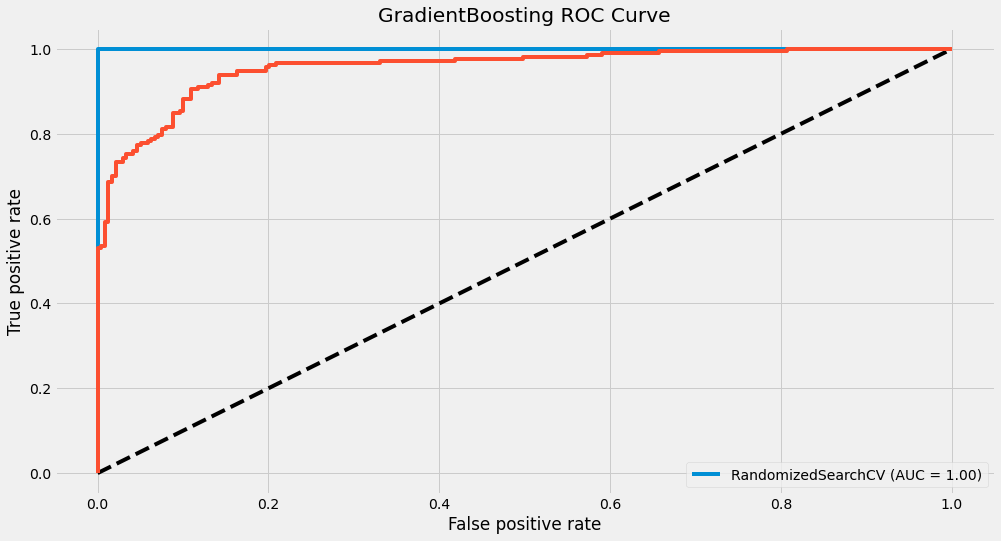

In [95]:
plot_roc_curve(grid,x_train,y_train)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GradientBoostingClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('GradientBoosting ROC Curve')
plt.show()

## Model Saving

In [96]:
import pickle
filename='Predicted_fraud_reported.pkl'
pickle.dump(GBc,open(filename,'wb'))